# Image Recognition using Convolutional Neural Network

# Table of contents
1. [Introduction](#introduction)
2. [Methodology: Data Collection, Data Preprocessing, Building Classifier Models, Evaluation, Prediction & Saving Models](#part2)

    2.1. [Part 1: Data Preprocessing](#subparagraph1)
    
    2.2. [Part 2: Building Classifier Models](#subparagraph2)
    
    2.3. [Part 3: Predictions](#subparagraph3)  
    
    2.4. [Part 4: Saving Keras Model](#subparagraph4)
    
3. [Conclusion](#conclusion)
4. [References](#references)

## **1. Introduction** <a name="introduction"></a>
Convolutional neural networks (abbreviated as “CNN”) have applications in computer vision like recognizing patterns, actions, emotions, faces and pictures or videos or even recognizing tumors in some brain images. CNN does this by categorizing images according to the objects included in them. Just like our brain often times mistakenly categorizes objects at first sight, convolutional neural networks are prone to the same indecision when presented with an object or an image from an angle that can easily place it under more than one category. 
My goal in this article is to address precisely the application of convolutional neural network in handwriting recognition making use of different classifier models generated from a Convolutional Neural Network using Keras with TensorFlow backend based on a set of training data. The models are then tested & evaluated on a test set to compare the accuracy & reduction in error rate achieved. Eventually, the best model is exploited to recognize numeric characters present in images not yet seen by the model. I will use the Modified National Institute of Standards and Technology (MNIST) database, already well known dataset of handwritten digits taken from American Census Bureau employees, and American high school students. 

## **2. Methodology: Data Collection, Data Preprocessing, Building Classifier Models, Evaluation, Prediction & Saving Models** <a name="part2"></a>
The evaluation is done by building 3 Neural networks starting from simple neural network to very basic Convolutional Neural Network and then to a larger CNN with two convolutional layer and pooling layer. After evaluation, the model is used to predict images previously not trained or tested by the model. The model is then saved to a single HDF5 file allowing running the model exactly where it was left off. I follow the codes obtained from pages like Keras documentation, luisfredgs’ medium.com article & also from Jason Brownlee’s machinelearningmastery.com, but using it in a way I comprehended the working of CNN.

### **2.1 Part 1: Data Preprocessing** <a name="subparagraph1"></a>
#### Loading the MNIST dataset from Keras 
Keras & Tensorflow can import and download the MNIST dataset directly from their API. The digits are already size-normalized and centered in a fixed-size image to facilitate the user to spend minimal efforts on preprocessing and formatting.

#### Visualization of Data
Colored images are represented in three dimensional information (RGB), but Black and white images need only two dimensional information. Hence for black and white images each pixel needs only a single layer. For images, the information about colors is given in terms of pixels and 1 byte is used for each pixel. One byte contains 8 bits, each of which can take the value of 1 or 0. So the maximum number of combinations possible is 256 (2^8). Hence two-dimensional black & white images will be represented in the scale 0 to 255 where 0 is pitch black and 255 is pure white and in between are various shades of grey.
MNIST database of handwritten digits contains a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. X_train and X_test parts contain greyscale codes from 0 to 255, while y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are. These numbers can be visualized with the help of matplotlib.

Using TensorFlow backend.


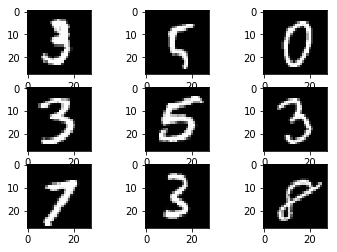

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline 

# load the MNIST dataset 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#To visualize first six mnist instances of training dataset
# plot 6 images as gray scale
plt.subplot(331)
plt.imshow(X_train[10], cmap=plt.get_cmap('gray'))
plt.subplot(332)
plt.imshow(X_train[100], cmap=plt.get_cmap('gray'))
plt.subplot(333)
plt.imshow(X_train[1000], cmap=plt.get_cmap('gray'))
plt.subplot(334)
plt.imshow(X_train[10000], cmap=plt.get_cmap('gray'))
plt.subplot(335)
plt.imshow(X_train[20000], cmap=plt.get_cmap('gray'))
plt.subplot(336)
plt.imshow(X_train[30000], cmap=plt.get_cmap('gray'))
plt.subplot(337)
plt.imshow(X_train[40000], cmap=plt.get_cmap('gray'))
plt.subplot(338)
plt.imshow(X_train[50000], cmap=plt.get_cmap('gray'))
plt.subplot(339)
plt.imshow(X_train[59999], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### **Part 2: Building Classifier Models** <a name="subparagraph2"></a>
#### Baseline Classifier Model
To start with, first the analysis is done using a very simple neural network classifier model with a single hidden layer as done in Artificial Neural Network. The model is defined in a baseline classifier function with parameters like 'softmax' activation, 'categorical_crossentropy' (Logarithmic loss) loss function, & 'adam' gradient descent optimizer. The model is fit over 10 epochs with a batch size of 200 images. The model is then evaluated using test set accuracy and error rate. 

In [2]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]

# Reshaping the array to 2-dims so that it can work with the Keras simple Neural network
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define baseline classifier
def baseline_NNclassifier():
# create model
    classifier = Sequential()
    classifier.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    classifier.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile classifier model
    classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return classifier
# build the classifier model
classifier = baseline_NNclassifier()
# Fit the model
classifier_history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the classifier model
scores = classifier.evaluate(X_test, y_test, verbose=0)
print("acc: %.2f%%" % (scores[1]*100))
print("Baseline NN Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.2822 - acc: 0.9197 - val_loss: 0.1429 - val_acc: 0.9568
Epoch 2/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.1114 - acc: 0.9684 - val_loss: 0.0925 - val_acc: 0.9720
Epoch 3/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0721 - acc: 0.9789 - val_loss: 0.0769 - val_acc: 0.9759
Epoch 4/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0503 - acc: 0.9857 - val_loss: 0.0636 - val_acc: 0.9803
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0363 - acc: 0.9899 - val_loss: 0.0699 - val_acc: 0.9788
Epoch 6/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0271 - acc: 0.9929 - val_loss: 0.0653 - val_acc: 0.9785: 1s - 

This simple neural network classifier model achieved a remarkable accuracy of 98.19% with a marginal error rate of 1.81%.

Convolutional Neural Network can be employed to improve the accuracy further. 
#### CNN Architecture
The model is initialized by creating an object of the sequential class. CNN building process takes four steps. Step one, Convolution; step two, Max Pooling, step three, Flattening and step four, Full Connection. Layers can be added in between each of these steps to tune the model to achieve the best accuracy possible. 

To know the shape of the dataset to channel it to the convolutional neural network the “shape” attribute of numpy array is used. 

In [3]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

60000 represents the number of images in the train dataset and (28, 28) represents the size of the image: 28 x 28 pixels. Images with 28 by 28 pixels with only greyscale, will end up having 784 (28 x 28 x 1) neurons in a layer which seems manageable. 

#### Reshaping the input X array
As seen above, the input x array is 3-dimensional. It needs to be converted to 4-dimensional numpy arrays to be able to use the dataset in Keras CNN. This is achieved easily by using the reshape() function on the NumPy array. 

#### Normalizing the Images
Dividing by the maximum value of 255, all pixel values will be rescaled between zero and one.

#### One hot encoding of categorical output values
This is a multi-class classification problem where the output variable is an integer ranging from 0 to 9. To transform the vector of class integers into a binary matrix, one hot encoding is done on the categorical values using the built-in np_utils.to_categorical()function in Keras.

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras CNN
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

# Making sure that the values are float so as to get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the pixel values by dividing it by the max value of 255.
X_train /= 255
X_test /= 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (60000, 1, 28, 28)
Number of images in X_train 60000
Number of images in X_test 10000


#### Simple CNN classifier model
**_First Layer: The Input Layer_**

The input layer is MNIST hand-written digit grayscale 28 by 28 pixel square image. 


**_Second Layer: The first hidden layer - Convolution_**

The first hidden layer of the network is going to perform some convolutions scanning over the input image using 32 distinct filters (also known as feature detectors or neurons or convolution kernel). The feature detectors will be 5x5 dimensions in size with 1x1 stride (1 pixel shift at each step). Convolving a 5x5 filter with a 28x28 pixel image yields a 24x24 (26.5% reduced complexity) filtered image, called feature map. The feature map contains some numbers and the highest numbers of the feature map is where the feature detector could detect a specific feature in the input image. This operation here between the input image and the feature detector that results in the future map, is the convolution operation and is done using Convolution2D function. The first argument is nb_filter, the number of filters. This is exactly the number of feature detectors that I’m going to apply on the input image to get this same number of feature maps because there will be one feature map created for each filter used. The second argument is the dimensions of the feature detector used. The third argument is the number of feature detectors; working on a CPU, I am limiting the number to 32. The fourth argument is input_shape, the shape of the input image on which I am going to apply the feature detectors through the convolution operation and this converts all our images into one fixed size of the image  with one same single format of 2D arrays with one channel for a black and white image. Finally, the well performed “rectifier linear unit (relu)” is taken as the activation function. 
These 32 convolutions with 5x5 feature detectors will generate 32 separate output maps, with a 32x24x24 matrix as the output of layer 2. 


**_Third Layer: Second hidden layer- Max pooling_**

Pooling step just consists of reducing the size of convoluted feature maps. This is done by sliding a 2x2 dimension square table over the feature map with a stride of two to take the maximum of the four cells.  The size of the original feature map is divided by two when max pooling is applied. This has the effect of subsampling the output maps by a factor of 2 in both dimensions, so we get a 32x12x12 matrix pooling layer. This is to reduce the number of nodes for the next step, that is the Flattening step and then the Full Connection step because in these next steps basically the outcome is all the cells of feature maps, flattened in one huge one-dimensional vector. So, if the size of these feature maps is not reduced, the outcome will be a too large vector and then too many nodes in the fully connected layers and therefore the model will become highly compute-intensive. To avoid this max pooling is applied to reduce the size of feature maps and therefore to reduce the number of nodes in the future fully connected layers reducing the complexity and the time execution but without the losing the performance of the model. 
The max pooling is done using MaxPooling2D function with a pool size of two-by-two dimensions. 


**_Fourth Layer: Dropout_**

To tackle overfitting, dropout regularization is applied to the neurons so that 20% of them randomly become disabled at each iteration. 


**_Fifth Layer: Flattening_**

This layer consists of taking all the pooled feature maps and put them into one single huge one dimensional vector by applying the Flatten step. 


**_Sixth Layer: The full connection_**

output_dim parameter which is the number of nodes in the hidden layer is taken as 128 along with the ‘rectifier linear(relu)’ activation function. 


**_Seventh Layer: The output layer_**

The output layer is configured with Softmax activation function for multiclass classification problem and 10 output units corresponding to 10 classes from 0 to 9 digits. 


**_Fit the model_**

Same as done above for the simple neural network, the classifier model is then compiled to train using logarithmic loss 'categorical_crossentropy' which is specific for multiclass classification and the ‘adam’ gradient descent optimizer.
The classifier model is then evaluated using test set accuracy and error rate. 

In [5]:
def large_CNNclassifier():
# create model
    classifier = Sequential()
    classifier.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2, 2)))
    classifier.add(Dropout(0.2))
    classifier.add(Flatten())
    classifier.add(Dense(128, activation='relu'))
    classifier.add(Dense(num_classes, activation='softmax'))
# Compile classifier model
    classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return classifier
# build the model
classifier = large_CNNclassifier()
# Fit the model
classifier_history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = classifier.evaluate(X_test, y_test, verbose=0)
print("acc: %.2f%%" % (scores[1]*100))
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.2443 - acc: 0.9296 - val_loss: 0.0787 - val_acc: 0.9772
Epoch 2/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0708 - acc: 0.9791 - val_loss: 0.0532 - val_acc: 0.9831
Epoch 3/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0503 - acc: 0.9848 - val_loss: 0.0448 - val_acc: 0.9856
Epoch 4/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0405 - acc: 0.9878 - val_loss: 0.0346 - val_acc: 0.9891
Epoch 5/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0319 - acc: 0.9896 - val_loss: 0.0403 - val_acc: 0.9874
Epoch 6/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0273 - acc: 0.9919 - val_loss: 0.0395 - val_acc: 0.9881
Epoch 7/10


As can be seen from the result, the classifier model is improved further achieving a better accuracy of 98.80% with lesser error rate of 1.20%. 


#### Larger CNN classifier model 

**_First Layer: The Input Layer_**

As above, the 4 dimensionally reshaped, normalized X_arrays. 


**_Second Layer: The first hidden layer - Convolution_**

As above the convolution of 28x28 pixel image with 32 5x5 feature detector yielding 32x24x24 (26.5% reduced complexity) filtered image, called feature map.


**_Third Layer: Second hidden layer- Max pooling_**

As above pooling layer with 5x5 dimensions to output 32x12x12 pooled layer.

**_Fourth Layer: Third hidden layer – Second convolution layer_**

The fourth layer is another convolution layer. Here I’ll apply 15 distinct filters with a kernel size of 5x5, to contain 15 neurons. 
When a convolution is performed on the original input image, the image only had a depth of 1 (because it’s grayscale). However, the output of third layer with dimension has a depth of 32. A single neuron in the fourth layer is going to be connected to all 32 pooled maps from the third layer. One way to think about how this is controlled is to say that the fourth layer filters have a size of 15x5x5. That is, each filter in the fourth layer has 375 unique weight values in it. In the code, however, convolutions are only done with two-dimensional filters. Instead of having 15 32x5x5 filters, we have 480 1x5x5 filters. For each of the 15 fourth layer filters, there are 32 separate 1x5x5 kernels. To apply a single fourth layer filter, 32 convolutions (one for each output map in the third layer) are performed, and then sum up all of the resulting maps to make a single 1x10x10 output map for that filter. This is done for each of the 15 filters to create the 15x10x10 output of the fourth layer.


**_Fifth Layer: Fourth hidden layer – Second Max pooling_**

Finally, one last pooling operation that’s identical to the one in the third layer is executed, subsampling by a factor of 2 in each dimension to generate the 15x5x5 output of the fifth layer.


**_Sixth Layer: Dropout_**

To tackle overfitting, dropout regularization is applied to the neurons so that 20% of them randomly become disabled at each iteration. 


**_Seventh Layer: Flattening_**

The resulting output maps are unwound into our final feature vector containing 375 values (15x5x5 = 375).


**_Eighth Layer: The full connection_**

Two layers are chosen with the number of nodes in the hidden layer is taken as 128 for the first and 50 for the second; both are configured with the ‘rectifier linear (relu)’ activation function.


**_Ninth Layer: The output layer_**

The output layer with Softmax activation function for multiclass classification problem and 10 output units corresponding to 10 classes from 0 to 9 digits. 

In [6]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define the larger model
def larger_CNNclassifier():
# create model
    classifier = Sequential()
    classifier.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2, 2)))
    classifier.add(Conv2D(15, (3, 3), activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2, 2)))
    classifier.add(Dropout(0.2))
    classifier.add(Flatten())
    classifier.add(Dense(128, activation='relu'))
    classifier.add(Dense(50, activation='relu'))
    classifier.add(Dense(num_classes, activation='softmax'))
# Compile model
    classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return classifier
# build the model
classifier = larger_CNNclassifier()
# Fit the model
classifier_history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = classifier.evaluate(X_test, y_test, verbose=0)
print("acc: %.2f%%" % (scores[1]*100))
print("Larger CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.3826 - acc: 0.8768 - val_loss: 0.0765 - val_acc: 0.9764
Epoch 2/10
60000/60000 [==============================] - 133s 2ms/step - loss: 0.0957 - acc: 0.9704 - val_loss: 0.0529 - val_acc: 0.9830
Epoch 3/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0703 - acc: 0.9782 - val_loss: 0.0398 - val_acc: 0.9868
Epoch 4/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0562 - acc: 0.9823 - val_loss: 0.0330 - val_acc: 0.9894
Epoch 5/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0484 - acc: 0.9849 - val_loss: 0.0309 - val_acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0418 - acc: 0.9874 - val_loss: 0.0265 - val_acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0381 - acc: 0.9882 - val_loss: 0.0375 - 

Evaluation shows 99.18% accuracy on test set!. The improvement in accuracy with epochs can be visualized below:

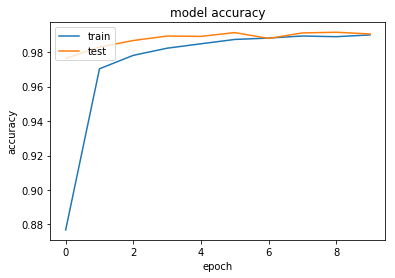

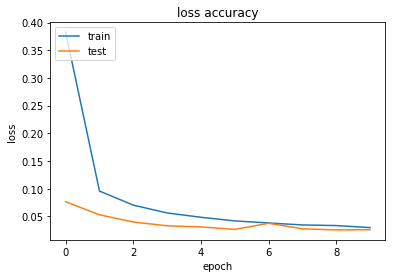

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(classifier_history.history['acc'])
plt.plot(classifier_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
plt.plot(classifier_history.history['loss'])
plt.plot(classifier_history.history['val_loss'])
plt.title('loss accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
import os
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               48128     
__________

### **Part 3: Predictions** <a name="subparagraph3"></a>
Individual predictions with X_test single image can be done with the following code: 

3


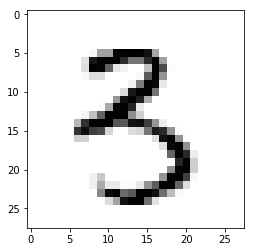

In [9]:
image_index = 5000
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = classifier.predict(X_test[image_index].reshape(1, 1, 28, 28))
print(pred.argmax())

Even with a not so clear hand written image of the number 3, the model was able to classify it as 3.

**Making predictions on new image, unknown to classifier model**

1  with confidence of  98.37%


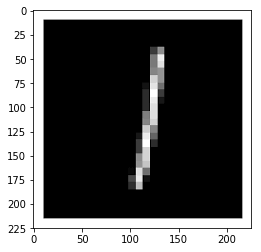

In [10]:
# Making new predictions
import cv2
img_pred = cv2.imread("images 1.png", 0)
plt.imshow(img_pred, cmap='gray')
if img_pred.shape != [28,28]:
    img2 = cv2.resize(img_pred, (28, 28))
    img_pred = img2.reshape(28, 28, -1)
else:
    img_pred = img_pred.reshape(28, 28, -1)


img_pred = img_pred.reshape(1, 1, 28, 28).astype('float32')

img_pred = img_pred/255.0
pred = classifier.predict_classes(img_pred)
pred_proba = classifier.predict_proba(img_pred)
pred_proba = "%.2f%%" % (pred_proba[0][pred]*100)
print(pred[0], " with confidence of ", pred_proba)

0  with confidence of  99.98%


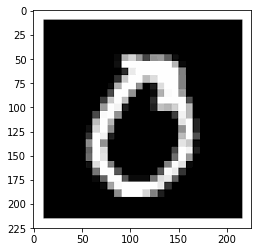

In [11]:
import cv2
img_pred = cv2.imread("image 0.png", 0)
plt.imshow(img_pred, cmap='gray')
if img_pred.shape != [28,28]:
    img2 = cv2.resize(img_pred, (28, 28))
    img_pred = img2.reshape(28, 28, -1)
else:
    img_pred = img_pred.reshape(28, 28, -1)


img_pred = img_pred.reshape(1, 1, 28, 28).astype('float32')

img_pred = img_pred/255.0
pred = classifier.predict_classes(img_pred)
pred_proba = classifier.predict_proba(img_pred)
pred_proba = "%.2f%%" % (pred_proba[0][pred]*100)
print(pred[0], " with confidence of ", pred_proba)

### **Part 4: Saving Keras Model** <a name="subparagraph4"></a>
To save a Keras model into a single HDF5 file which will contain: the architecture of the model, allowing to re-create the model; the weights of the model; the training configuration (loss, optimizer); the state of the optimizer, allowing to resume training exactly where it was left off, the following codes are used.

In [12]:
from keras.models import load_model
classifier.save('my_modelMNIST.h5')  # creates a HDF5 file 'my_modelMNIST.h5'
del classifier  # deletes the existing model

# returns a compiled model identical to the previous one
classifier = load_model('my_modelMNIST.h5')

#Saving/loading only a model's architecture
# save as JSON
#json_string = classifier.to_json()

# save as YAML
#yaml_string = classifier.to_yaml()
# model reconstruction from JSON:
#from keras.models import model_from_json
#classifier = model_from_json(json_string)

# model reconstruction from YAML:
#from keras.models import model_from_yaml
#classifier = model_from_yaml(yaml_string)

## **3. Conclusion** <a name="conclusion"></a>
I have successfully built & saved a convolutional neural network model to classify hand written digits with TensorFlow backend Keras API which achieved accuracy over 99% 


## **4. References** <a name="conclusion"></a>
1.	Understanding the DeepLearnToolbox CNN Example http://mccormickml.com/2015/01/10/understanding-the-deeplearntoolbox-cnn-example/
2.	Description of the MNIST Handwritten Digit Recognition Problem https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/ 
3.	MNIST database of handwritten digits https://keras.io/datasets/#mnist-database-of-handwritten-digits
4.	Keras Documentation: How can I save a Keras model? https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model
5.	Reconhecimento de escrita manual com Redes Neurais Convolucionais https://medium.com/luisfredgs/reconhecimento-de-escrita-manual-com-redes-neurais-convolucionais-6fca996af39e